### 1. Импортируем модули и преобразовываем текст

In [5]:
from pymystem3 import Mystem
import re
import gensim
from gensim.models import word2vec
import collections
m = Mystem(mystem_bin="C:\ФИКЛ\для питона\mystem.exe")

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

Получаем текст, состоящий из лемм:

In [22]:
%%time
with open("C:\ФИКЛ\для питона\mertvie_dushi.txt", "r", encoding = "utf-8") as f:
    text = f.read()
    cleaned_text = re.sub(r'[^\w\s\.]','', text)
    noenters_text = cleaned_text.replace('\n', '')
    t_lemmas = m.lemmatize(noenters_text)
    t_lemmas = [l for l in t_lemmas if l] 

Wall time: 19.1 s


Дополнительно создаем words_counter, чтобы просто иметь представление о том, как часто встречаются те или иные слова:

In [23]:
whole_text = ''.join(t_lemmas)#преобразовываем ['лемма1', ' ', [лемма2]] в [лемма1 лемма2]
words_ = whole_text.split()
words_counter = collections.Counter(words_)
print(words_counter)

Counter({'и': 4837, 'в': 2927, 'не': 2457, 'он': 2444, 'что': 2110, 'быть': 2050, 'на': 1725, 'с': 1279, 'как': 1225, 'я': 1196, 'а': 904, 'сказать': 806, 'то': 750, 'так': 716, 'который': 694, 'они': 684, 'весь': 666, 'бы': 654, 'же': 648, 'это': 648, 'все': 646, 'вы': 646, 'но': 605, 'у': 584, 'да': 584, 'ты': 577, 'к': 570, 'такой': 568, 'по': 545, 'чичиков': 544, 'за': 488, 'только': 445, 'из': 432, 'человек': 430, 'себя': 429, 'свой': 427, 'какой': 419, 'уже': 407, 'ни': 399, 'один': 397, 'этот': 392, 'говорить': 391, 'она': 389, 'другой': 375, 'мочь': 374, 'тот': 373, 'даже': 367, 'еще': 351, 'его': 351, 'дело': 350, 'или': 344, 'сам': 331, 'знать': 330, 'вот': 319, 'ли': 308, 'от': 305, 'чтобы': 298, 'нет': 263, 'если': 260, 'о': 260, 'рука': 241, 'всякий': 241, 'самый': 241, 'время': 239, 'ведь': 238, 'давать': 229, 'становиться': 214, 'для': 213, 'уж': 213, 'тут': 206, 'ж': 205, 'когда': 204, 'кто': 203, 'во': 199, 'мы': 192, 'два': 190, 'слово': 187, 'душа': 186, 'ну': 175, '

Мы удалили все знаки препинания кроме точек. Так, мы сможем разделить текст по предложениям:

In [24]:
div_text = whole_text.split('.')

Запишем результат в отдельный файл:

In [5]:
with open("md_lemmas.txt", "w", encoding = 'utf-8') as f:
    for line in div_text:
        f.write(line)
        f.write('\n')

### 2. Обучение модели

In [6]:
fl = "md_lemmas.txt"
data = gensim.models.word2vec.LineSentence(fl)

In [7]:
%%time 
model_mrt_dushi = gensim.models.Word2Vec(data, size=300, window=5, iter=50, min_count=5)

Wall time: 26.6 s


Смотрим, сколько слов в модели получилось:

In [7]:
len_model = len(model_mrt_dushi.wv.vocab)
print(len_model)

2698


In [14]:
print(sorted(model_mrt_dushi.wv.vocab))

['N', 'а', 'автор', 'аглицкий', 'александр', 'александра', 'алексаша', 'алексей', 'алкид', 'амбар', 'андрей', 'анна', 'антихрист', 'антонович', 'аппетит', 'арбуз', 'архитектор', 'аршин', 'ассигнация', 'атласный', 'афанасий', 'ах', 'б', 'баба', 'бабенка', 'бабий', 'байбак', 'бакенбарда', 'бал', 'банк', 'баня', 'барабан', 'баран', 'бараний', 'барин', 'барский', 'бархатный', 'барыня', 'батюшка', 'бегать', 'беглый', 'беда', 'бедность', 'бедный', 'бежать', 'без', 'безделица', 'беленький', 'белизна', 'белокурый', 'белый', 'белье', 'берег', 'береза', 'беседа', 'бесконечный', 'беспорядок', 'беспрестанный', 'бестия', 'бестолковый', 'бесчестный', 'бетрищев', 'бить', 'биться', 'благодарить', 'благодаря', 'благодетель', 'благоразумие', 'благородный', 'благотворитель', 'бледный', 'блеск', 'блеснуть', 'ближний', 'близ', 'близкий', 'близко', 'блин', 'блистать', 'блондинка', 'блюдо', 'бог', 'богато', 'богатый', 'богоугодный', 'боже', 'божий', 'бойкий', 'бойко', 'бок', 'более', 'болезнь', 'болеть', 'бо

### 3. Использование различных функций

**Находим ближайшие 5 слов для:**

частотного союза "а":

In [23]:
frq_ptcl = 'а'
if frq_ptcl in model_mrt_dushi:
    for i in model_mrt_dushi.most_similar(positive=[frq_ptcl], topn=5):
            print(i[0], i[1])

да 0.4657541811466217
высекать 0.4157285988330841
жить 0.4029184579849243
скотина 0.4018372893333435
кормить 0.39159566164016724


<ipython-input-23-d5467e161313>:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if frq_ptcl in model_mrt_dushi:
<ipython-input-23-d5467e161313>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for i in model_mrt_dushi.most_similar(positive=[frq_ptcl], topn=5):


абстрактного понятия "любовь":

In [24]:
abstr = 'любовь'
if abstr in model_mrt_dushi:
    for i in model_mrt_dushi.most_similar(positive=[abstr], topn=5):
            print(i[0], i[1])
else:
    print("такого слова нет")

уважение 0.6466900110244751
начальство 0.6254212856292725
ничтожный 0.6032731533050537
достоинство 0.5963383913040161
способный 0.5918756127357483


<ipython-input-24-7cfcd6b966a2>:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if abstr in model_mrt_dushi:
<ipython-input-24-7cfcd6b966a2>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for i in model_mrt_dushi.most_similar(positive=[abstr], topn=5):


главного героя "Мертвых душ" — Чичикова:

In [25]:
main_chctr = 'чичиков'
if main_chctr in model_mrt_dushi:
    for i in model_mrt_dushi.most_similar(positive=[main_chctr], topn=5):
            print(i[0], i[1])
else:
    print("такого слова нет")

костанжогнуть 0.6528454422950745
хлобуев 0.55876225233078
ноздрев 0.5299467444419861
вслух 0.5141605734825134
платонов 0.5132259726524353


<ipython-input-25-6578049bf86d>:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if main_chctr in model_mrt_dushi:
<ipython-input-25-6578049bf86d>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for i in model_mrt_dushi.most_similar(positive=[main_chctr], topn=5):


антонимов "хороший" и "плохой":

In [16]:
good = 'хороший'
if good in model_mrt_dushi:
    print('хороший: ')
    for i in model_mrt_dushi.most_similar(positive=[good], topn=5):
            print(i[0], i[1])
else:
    print("такого слова нет")
print('\n')
bad = 'плохой'
if bad in model_mrt_dushi:
    print('плохой: ')
    for i in model_mrt_dushi.most_similar(positive=[bad], topn=5):
            print(i[0], i[1])
else:
    print("такого слова нет")

хороший: 
звание 0.5387316942214966
работник 0.5306882262229919
управитель 0.4927196204662323
обманывать 0.46620994806289673
обращение 0.45903530716896057


плохой: 
степан 0.5323353409767151
тюрьма 0.47948676347732544
годиться 0.47249019145965576
итак 0.4672916829586029
пойти 0.4595240354537964


<ipython-input-16-6218c5d60cdb>:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if good in model_mrt_dushi:
<ipython-input-16-6218c5d60cdb>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for i in model_mrt_dushi.most_similar(positive=[good], topn=5):
<ipython-input-16-6218c5d60cdb>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if bad in model_mrt_dushi:
<ipython-input-16-6218c5d60cdb>:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for i in model_mrt_dushi.most_similar(positive=[bad], topn=5):


У этих антонимов не обнаружено общих 5 ближайших слов. Зато есть довольно забавный момент, что ближайшее слово к "плохому" это Степан.

**Пример формулы «король − мужчина + женщина» вдохновил меня проверить нечто подобное. В "Мертвых душах" нет королей и королев, слова "мужчина" и "женщина" не слишком частотны. Но тут часто употребляются подобные слова: хозяин, помещик, хозяйка, помещица, барин, барыня и т.п. Попробуем составить следующую пропорцию:**

In [6]:
print(model_mrt_dushi.most_similar(positive=['барин', 'барыня'], negative=['хозяин']))

[('старушка', 0.5423316359519958), ('коробочка', 0.5030596852302551), ('помещица', 0.495498925447464), ('иван', 0.49503597617149353), ('селифан', 0.4874896705150604), ('душенька', 0.48576706647872925), ('принесика', 0.4839324951171875), ('григорьевич', 0.4775075912475586), ('чего', 0.47443073987960815), ('гадкий', 0.4734550714492798)]


<ipython-input-6-8fdbd7e0506c>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model_mrt_dushi.most_similar(positive=['барин', 'барыня'], negative=['хозяин']))


Хотя здесь нет слова "хозяйка", есть другие интересные результаты, которые вполне удовлетворяют ожиданиям, например "помещица". Вполне логично появление "старушки" и "Коробочки", ведь Коробочка и есть старая помещица. Эти результаты устраивают меня по крайней мере тем, что все три существительных женского рода, а по смыслу похожи с "барином" и "хозяином", пусть даже только в данном произведении. В следующем окне находится лишнее слово, опять же по роду:

In [9]:
print(model_mrt_dushi.doesnt_match('хозяин дама барин'.split()))

дама


<ipython-input-9-c49f17dfbab2>:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  print(model_mrt_dushi.doesnt_match('хозяин дама барин'.split()))


### 4. Визуализация

Создадим визуализацию на именах главных героев "Мертвых душ", которые являются помещиками в произведении:

In [8]:
characters = ['чичиков', 'манилов', 'коробочка','ноздрев', 'собакевич', 'плюшкин']
X = model_mrt_dushi[characters]


<ipython-input-8-a202da5f2e37>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model_mrt_dushi[characters]


In [9]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

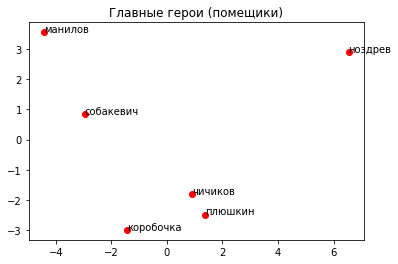

In [10]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Главные герои (помещики)')

for i, word in enumerate(characters):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

Трудно сказать что-то конкретное по данной картине, но, наверно, здесь все же можно выделить некоторые особенности распределения: те, кто любит праздную жизнь (Манилов и Ноздрев), находятся наверху. Те, кого интересует исключительно материальное положение (Чичиков, Плюшкин, Коробочка), располагаются внизу.

Теперь попробуем построить визуализацию на существительных, которые можно разделить условно на 2 группы: места жительства и одежда.

In [11]:
lvplaces = ['дом', 'имение', 'поместье', 'имущество', 'платье', 'кафтан']
XX = model_mrt_dushi[lvplaces]

<ipython-input-11-564affb17365>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  XX = model_mrt_dushi[lvplaces]


In [12]:
pca_2 = PCA(n_components=2)
coords_2 = pca_2.fit_transform(XX)

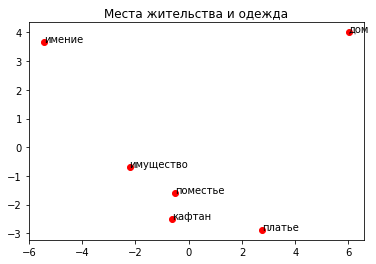

In [14]:
plt.scatter(coords_2[:, 0], coords_2[:, 1], color='red')
plt.title('Места жительства и одежда')

for i, word in enumerate(lvplaces):
    plt.annotate(word, xy=(coords_2[i, 0], coords_2[i, 1]))
plt.show()

Впрочем, здесь такое разделение на 2 группы нельзя четко увидеть. Между тем, "кафтан" и "платье" расположились действительно рядом. А слово "имущество" стремится к середине, что тоже хорошо, ведь и одежда, и места жительства можно назвать имуществом. Нахождение "поместья" рядом с одеждой, наверно, можно объяснить тем, что слова довольна часто употребляются рядом.

Создадим последнюю визуализацию на трех частях речи: союзы, существительные, глаголы. Союзы "а" и "и"— сочинительные, глаголы "говорить" и "сказать" можно считать синонимами. Сущесвительные "помещик" и "дом" связаны семантически, но в целом во многом отличаются.

In [15]:
dif_pos = ['а', 'и', 'дом', 'помещик', 'говорить', 'сказать']
XXX = model_mrt_dushi[dif_pos]

<ipython-input-15-9f5b93cc51e9>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  XXX = model_mrt_dushi[dif_pos]


In [16]:
pca_3 = PCA(n_components=2)
coords_3 = pca_3.fit_transform(XXX)

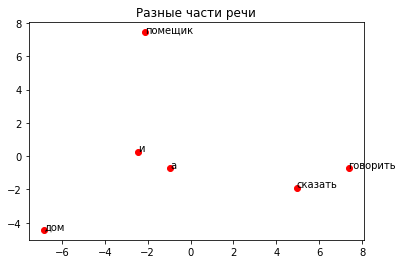

In [17]:
plt.scatter(coords_3[:, 0], coords_3[:, 1], color='red')
plt.title('Разные части речи')

for i, word in enumerate(dif_pos):
    plt.annotate(word, xy=(coords_3[i, 0], coords_3[i, 1]))
plt.show()

Приятно видеть то, что союзы и глаголы более менее сгруппировались. Дистанция между существительными тоже объяснима, хотя я ожидала, что они будут ближе.

### 5. Самое странное - замена предложения

Я поискала не самое длинное предложение, чтобы было понятнее.

In [25]:
print(div_text[101])
div_sent = div_text[101].split()
print(div_sent)

 в немного время он совершенно успевать очаровывать они
['в', 'немного', 'время', 'он', 'совершенно', 'успевать', 'очаровывать', 'они']


In [35]:
new_sent = []

for sent_word in div_sent:
    new_word = model_mrt_dushi.most_similar(positive=[sent_word], topn=1)
    for data in new_word:
        for elem in data:
#             print(type(elem))
#             print(elem)
            if type(elem) == str:
                new_sent.append(elem)

new_sentogether = ' '.join(new_sent)
print(new_sentogether)

находиться степенный пора было философ опоминаться окидывать пофранцузский


<ipython-input-35-e40c6352b9d8>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  new_word = model_mrt_dushi.most_similar(positive=[sent_word], topn=1)
